In [5]:
from selenium import webdriver
from selenium.webdriver.common.alert import Alert
import time
from selenium import webdriver
import xlrd
import pandas as pd
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException
import os
from bs4 import BeautifulSoup
from urllib.request import urlopen
from selenium.webdriver.common.alert import Alert
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

#selenium의 webdriver로 크롬 브라우저를 실행한다
driver = webdriver.Chrome("C:/Users/정영준/Desktop/chromedriver_win32/chromedriver.exe")

# 들어가려는 홈페이지 
driver.get("http://dart.fss.or.kr/dsac001/mainAll.do")

In [6]:
read = pd.read_excel('C:/Users/정영준/Desktop/상장기업목록.xlsx')
company_name = read['회사명'].tolist()

In [12]:
a=[0] # 날짜
b=[0] # 시간
c=[0] # 기업명
d=[0] # 보고서명
e=[0] # 보고서url


f=[0] # 주가 

g=[0] # 1분 뒤 주가
h=[0] # 관련기사

h0 = [0] # 기사url

h1=[0] # 기사날짜


# 자동매매 - 함수화 


In [28]:
import time
from datetime import datetime


while True:
    
    driver.find_element_by_xpath("""//*[@id="layoutLeft"]/div[1]/ul/li[5]/a/img""").click()

    for i in range(32,101,1):
        
        print(i,"번째 검사 중")            
        
        name = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,"""//*[@id="listContents"]/div[1]/table/tbody/tr[{}]/td[2]/span/a""".format(i)))).text
        this_time = driver.find_element_by_xpath("""//*[@id="listContents"]/div[1]/table/tbody/tr[{}]/td[1]""".format(i)).text
        report = driver.find_element_by_xpath("""//*[@id="listContents"]/div[1]/table/tbody/tr[{}]/td[3]""".format(i)).text

        # 중복제거

        if ((name in c)&(report in d)&(this_time in b)):

            continue

        elif (name in company_name):

            a.append(driver.find_element_by_xpath("""//*[@id="listContents"]/div[1]/table/tbody/tr[{}]/td[5]""".format(i)).text)
            b.append(driver.find_element_by_xpath("""//*[@id="listContents"]/div[1]/table/tbody/tr[{}]/td[1]""".format(i)).text)
            c.append(driver.find_element_by_xpath("""//*[@id="listContents"]/div[1]/table/tbody/tr[{}]/td[2]/span/a""".format(i)).text)
            d.append(driver.find_element_by_xpath("""//*[@id="listContents"]/div[1]/table/tbody/tr[{}]/td[3]""".format(i)).text)
            e.append(driver.find_element_by_xpath("""//*[@id="listContents"]/div[1]/table/tbody/tr[{}]/td[3]/a""".format(i)).get_attribute("href"))


            key = read.loc[read['회사명'] == c[-1] ,['종목코드']].values[0][0]

            driver.get("https://finance.naver.com/item/main.nhn?code="+str('{0:06d}'.format(key)))

            # 뉴스기사 (h,i)

            for j in range(1,6,1):

                h.append(driver.find_element_by_xpath("""//*[@id="content"]/div[3]/div[1]/ul[1]/li[{}]/span/a""".format(j)).text)
                h0.append(driver.find_element_by_xpath("""//*[@id="content"]/div[3]/div[1]/ul[1]/li[{}]/span/a""".format(j)).get_attribute("href"))


            # 감정분석

            # 기사날짜

            for k in range(1,6,1):
                
                WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,"""//*[@id="content"]/div[3]/div[1]/ul[2]/li[{}]/span/a""".format(k)))).text

                h1.append(driver.find_element_by_xpath("""//*[@id="content"]/div[3]/div[1]/ul[2]/li[{}]/span/a""".format(k)).text)

                # 감정분석

            rate = ''.join(driver.find_element_by_xpath('//*[@id="chart_area"]/div[1]/div').text.split('\n')[-7:-1])

            if ((rate[-6] == '+') | (rate[-6] == '-')):

                f.append(rate[-6:])
                print(b[-1], c[-1], d[-1], h[-1], h[-1], )


            elif ((rate[-5] == '+') | (rate[-5] == '-')):

                f.append(rate[-5:])
                print(b[-1], c[-1], d[-1], h[-1], h[-1], )

            else:
                f.append(rate[-4:])
                print(b[-1], c[-1], d[-1], h[-1], h[-1], )


            driver.back()


        else : 

            continue
            
            
            

SyntaxError: invalid syntax (<ipython-input-28-36c4d4d22858>, line 50)

In [52]:
a=[1]
b=[2,3]
c=[4,5,6]

array = [{'시발':a,'련아':b,'뭐시발':c}]

file = pd.DataFrame(array)
file

,련아,뭐시발,시발
0,"[2, 3]","[4, 5, 6]",[1]


In [56]:
a=1,2
b=3,4,5
c=5,6,7,8

array = [{'시발':a,'련아':b,'뭐시발':c}]

file = pd.DataFrame(array)
file

,련아,뭐시발,시발
0,"(3, 4, 5)","(5, 6, 7, 8)","(1, 2)"


In [73]:
a=[1]
b=[1,2]
c=[1,2,3]

file =pd.DataFrame(a,b,c)
file

ValueError: Shape of passed values is (1, 1), indices imply (2, 3)

In [74]:
a=[[[-4, -3, -2, -1], [1, 2, 3, 4]]]
b=[[[-4, -3, -2, -1], [1, 2, 3, 4]], [5, 6, 7, 8]]
c=[[9, 10, 11, 12], [[-4, -3, -2, -1], [1, 2, 3, 4]], [5, 6, 7, 8]]

In [141]:

d1=[2,3]
d=['a','b']

In [137]:
a = [ [1,2,3,4], [2,3],[3,6,5],[4],[6,7,8,'a']]

In [142]:
b = [  d1,d ]

In [143]:
file= pd.DataFrame(b)

file

,0,1
0,2,3
1,a,b


In [5]:
import pandas as pd


In [146]:


b=[1,2,3] # 테스트 
c=[2] # 날짜
d=[3] # 시간
e=[] # 기업명



a=[b,c,d,e]



file = pd.DataFrame( a)

file


,0,1,2
0,1.0,2.0,3.0
1,2.0,NaN,NaN
2,3.0,NaN,NaN
3,NaN,NaN,NaN


In [ ]:
a=[] 을 만들고, 
a.append(테스트)
a.append(날짜)
a.append(시간)
a.append(기업명) 만들면
a=[1,2,3,4]
[a]로 행을 만들어 dataframe

a=[] 을 만들고, 
반복하여

dataframe.append 가능한지? 

// 기타 누락되는 데이터 예방법 찾아보기


In [118]:
file = pd.DataFrame( a , columns=['테스트','날짜', '시간', '기업명'])


file

AssertionError: 4 columns passed, passed data had 1 columns

In [115]:
b.append(1)

AttributeError: 'tuple' object has no attribute 'append'

In [ ]:
file = pd.DataFrame( array , columns=['테스트','날짜', '시간', '기업명'])

In [109]:
# array = [  a,b,c,d,e,f,g,h,i,j  ]

array = [a]

file = pd.DataFrame( array , columns=['테스트','날짜', '시간', '기업명', '보고서명', '보고서url', '주가', '나중주가', '기사', '기사날짜', '기사url'])

file

,테스트,날짜,시간,기업명,보고서명,보고서url,주가,나중주가,기사,기사날짜,기사url
0,"[0, 1]",1,2,3,4,5,6,7,8,9,10


In [110]:
key = [[]]


In [111]:
key.append(1)

key

[[], 1]

In [84]:
import numpy as np


array = np.array([]) 
newrow = [1, 2, 3] 
# newrow1 = [4, 5, 6] 
new = np.concatenate((array,newrow), axis=0) 

In [98]:
B = np.array([100,200,300])

B

array([100, 200, 300])

In [99]:
B = B.reshape(-1,1)
B

array([[100],
       [200],
       [300]])

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [96]:
B.shape

(3, 1)

In [100]:
file = pd.DataFrame(B)

In [101]:
file

,0
0,100
1,200
2,300


In [72]:


for j in range(3):
    
    a=[]
    
    for i in range(10):

        a.append(i+j)

    array = [a]
    print(array)
    file.append( array )
file


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]


,테스트,날짜,시간,기업명,보고서명,보고서url,주가,나중주가,기사,기사날짜,기사url
0,0,1,2,3,4,5,6,7,8,9,10


In [48]:
file

,테스트,날짜,시간,기업명,보고서명,보고서url,주가,나중주가,기사,기사날짜,기사url
0,0,1,2,3,4,5,6,7,8,9,10


In [41]:

for i in range(10):

    a.append('테스트')


['테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트', '테스트']


,테스트,날짜,시간,기업명,보고서명,보고서url,주가,나중주가,기사,기사날짜,기사url
0,0,1,2,3,4,5,6,7,8,9,10


,테스트,날짜,시간,기업명,보고서명,보고서url,주가,나중주가,기사,기사날짜,기사url
0,0,1,2,3,4,5,6,7,8,9,10


,테스트,날짜,시간,기업명,보고서명,보고서url,주가,나중주가,기사,기사날짜,기사url
0,0,1,2,3,4,5,6,7,8,9,10


In [71]:
a=[1,2,3]
b=["",2,3,4]
c=[2,3,4,4,5]
file = pd.DataFrame({'시발':a,'련아':b,'뭐시발':c})
file

ValueError: arrays must all be same length

In [63]:
file = pd.DataFrame(a,b,c)

ValueError: Shape of passed values is (1, 1), indices imply (2, 3)

ValueError: arrays must all be same length

In [23]:
import time
from datetime import datetime


while True:
    
    driver.find_element_by_xpath("""//*[@id="layoutLeft"]/div[1]/ul/li[5]/a/img""").click()

SyntaxError: unexpected EOF while parsing (<ipython-input-23-dcb1efa1bdcf>, line 7)

NameError: name 'i' is not defined

In [17]:
# 뉴스기사 (h,i)

for i in range(1,6,1):

    h.append(driver.find_element_by_xpath("""//*[@id="content"]/div[3]/div[1]/ul[1]/li[{}]/span/a""".format(i)).text)
    # 감정분석
    
# 기사날짜

for i in range(1,5,1):
    
    i.append(driver.find_element_by_xpath("""//*[@id="content"]/div[3]/div[1]/ul[2]/li[{}]/span/a""".format(i)).text)
    # 감정분석




'[fnRASSI]SK3호스팩, 1.19% 오르며 거래량 증가'

In [43]:
import json
import urllib

In [55]:
for x in driver.find_elements_by_xpath('//div[contains(@id,"NaverChart")]'):

    img = json.loads(x.get_attribute('innerHTML'))["ou"]
    print(img)

    imgtype = json.loads(x.get_attribute('innerHTML'))["ity"]
    
    try:
        req = urllib.request(img, headers={'User-Agent': header})
    
        raw_img = urllib.request.urlopen(req).read()

    except:
        print ("can't get img")

In [71]:
date = pd.date_range('2017-5-1', periods=100, freq='D')


In [74]:
import random

a = []

for i in range(100):
    
    num = random.randrange(1, 11)
    
    a.append(num)
    





In [99]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from datetime import datetime
import pandas_datareader.data as web


# 주가 데이터를 불러온다. 

start = datetime(2016,1,1)

end = datetime(2019,5,1)

# 삼성바이오로직스 

SB = web.DataReader('207940.KS','yahoo',start,end)


# 상장된 날을 알아야 한다. 
# volume = 거래량 (주)

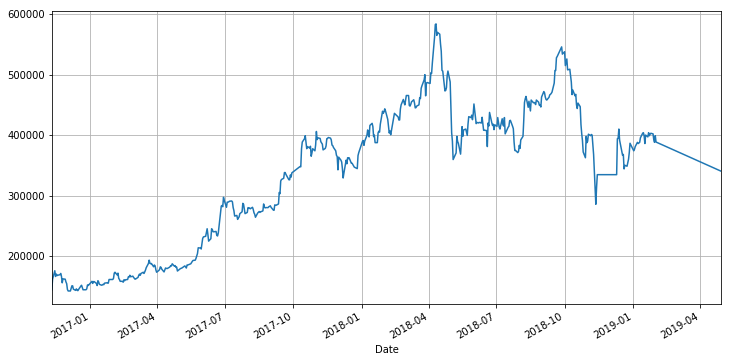

In [100]:
# '종가'를 기준으로 그래프를 그린다

SB['Close'].plot(figsize=(12,6), grid=True)

In [102]:
df = pd.DataFrame({'ds':SB.index, 'y':SB['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2016-11-10,144000
1,2016-11-11,161500
2,2016-11-14,175500
3,2016-11-15,166000
4,2016-11-16,170000


In [111]:
from dateutil.parser import parse as p
from pandas import Series, DataFrame
import win32com.client
import numpy as np


In [113]:
instCpStockCode = win32com.client.Dispatch('CpUtil.CpStockCode')

com_error: (-2147221005, '잘못된 클래스 문자열입니다.', None, None)

In [88]:
import urllib.request, time, os, re, csv, sys



def fetch(daumticker):

    #print("daumticker",daumticker)

    url="http://finance.daum.net/item/main.daum?code="

    txt=urllib.request.urlopen(url+daumticker).read().decode()

    k=re.search('class="curPrice(.*?)">(.*?)<',txt)

    r=re.search('class="rate (.*?)?>(.*?)<',txt)

    if k:

        price=k.group(2)

        #q=tmp.replace(',','')

    else:

        price = "Nothing found for: " + daumticker + " price"

    if r:

        rate = r.group(2)

    else:

        rate = "Nothing found for: " + daumticker + " rate"

    return price, rate





# display time corresponding to your location

print(time.ctime())



# Set local time zone to Seoul

os.environ['TZ']='Asia/Seoul'



t=time.localtime() # string

print(time.ctime())





def combine(ticker):

    price, rate = fetch(ticker)

    t=time.localtime()    

    output=[t.tm_year,t.tm_mon,t.tm_mday,t.tm_hour,  

            t.tm_min,t.tm_sec,ticker,price,rate]

    return output









tickers = []

for i in range(1,len(sys.argv)):

    tickers.append(sys.argv[i])



print("Stock List(s) : ",tickers)

# define the name of an output file





fname="portfolio.csv"

# remove a file, if exist

os.path.exists(fname) and os.remove(fname)



freq=10 







with open(fname,'a') as f:

    writer=csv.writer(f,dialect="excel") #,delimiter=" ")

    while(t.tm_hour<=15):

        if(t.tm_hour==15):

            while(t.tm_min<30):

                for ticker in tickers:

                    data=combine(ticker)

                    print(data)

                    writer.writerow(data)

                time.sleep(freq)

            else:

                break

        else:

            for ticker in tickers:

                data=combine(ticker)

                print(data)

                writer.writerow(data)

            time.sleep(freq)



f.close()

Wed May  1 21:24:44 2019
Wed May  1 21:24:44 2019
Stock List(s) :  ['-f', 'C:\\Users\\정영준\\AppData\\Roaming\\jupyter\\runtime\\kernel-3db1ff80-6cac-4617-accf-8bded6fe58e6.json']


In [73]:
num

8

In [63]:
print(date.to_list()[1])

2017-05-02 00:00:00


In [70]:
print(date.to_list()[1])

2017-05-02 00:00:00


<selenium.webdriver.remote.webelement.WebElement (session="dff815a3d565d4a7377eb0a99af70589", element="0.08179799568933888-1")>

In [41]:
try:
    req = urllib.request(img, headers={'User-Agent': header})
    raw_img = urllib.request.urlopen(req).read()

except:
    print ("can't get img")

can't get img


In [44]:
req = urllib.request(img, headers={'User-Agent': header})
raw_img = urllib.request.urlopen(req).read()

NameError: name 'img' is not defined

In [20]:
//*[@id="NaverChart"]

시발아


'09/04'